# 데이터 수집

## 산림청 국립자연휴양림관리소_숲나들e 숲길 100대명산 정보
* https://www.data.go.kr/data/15112801/fileData.do
* 숲길 100대 명산은 명산이름, 명산소재지m 명산높이, 난이도, 특징및선정이유, 산개요, 산행포인트, 산행코스, 교통정보, X좌표, Y좌표를 제공합니다.
* 제공기관 : 산림청 국립자연휴양림관리소(관리부서명 : 숲나들e운영팀)
* 업데이트 주기 : 수시 (수정일:2023-03-30)

In [1]:
import folium
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import html
import datetime
from folium.plugins import MarkerCluster
import time
import seaborn as sns
from folium import Marker
import webbrowser
from matplotlib import font_manager,rc

font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

df_main=pd.read_csv('data_san.csv', encoding='utf-8')
df_main.shape

(100, 11)

## 초기 데이터 분석

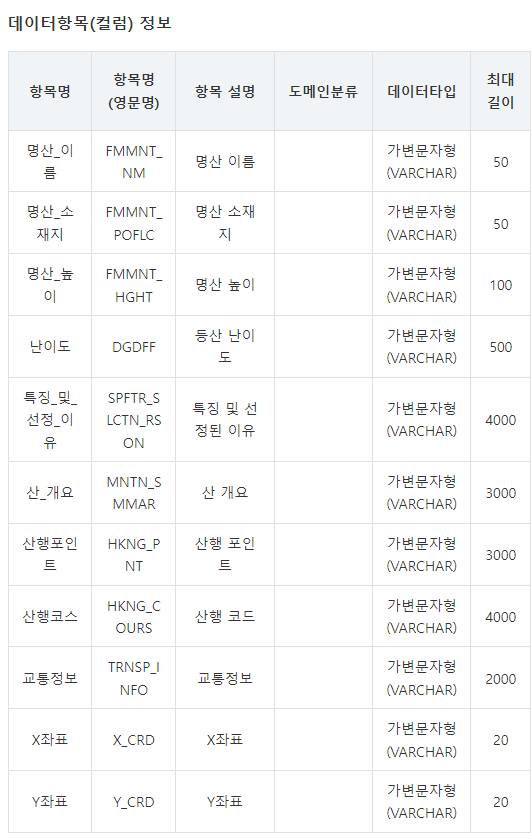

In [2]:
df_main.head(2)

,명산_이름,명산_소재지,명산_높이,난이도,특징_및_선정_이유,산_개요,산행포인트,산행코스,교통정보,X좌표,Y좌표
0,가리산,"강원도 홍천군 두촌면ㆍ화촌면, 춘천시 북산면ㆍ동면",1050.9,산행시간 : 3시간30분~4시간미만산높이 : 1100m ~ 1200m 미만 난이도 : -,"강원도에서 진달래가 가장 많이 피는 산으로 알려져 있고, 참나무 중심의 울창한 산림...",&#91;소양강 비경 담은 신비한 암봉&#93; 가리산은 강원도 홍천군 두촌면과 ...,가리산자연휴양림 통나무 산막을 지나 산길로 들어서면 나무로 만든 안전난간이 설치된 ...,"&lt;table class=""tbl mb_10""&gt;\t\t\t\t&lt;cap...","홍천에서 역내리, 천현리행 버스를 이용해 가리산자연휴양림에서 내린다. - 홍천→역...",37.874149,127.960749
1,가리왕산,"강원도 정선군 북평면ㆍ정선읍 회동리, 평창군 진부면",1561.9,산행시간 : -산높이 : 1500m 이상 난이도 : 중급,"가리왕산 8경이 전해질 만큼 경관이 수려하고, 활엽수 극상림이 분포해 있으며, 전국...",&#91;정선아리랑 흐르는 정선의 지붕&#93; 강원도 평창군과 정선군은 이 고장 ...,평창군 대화면 하안미 5리 백일동 버스종점에서 포장도로를 따라 도치동 방향으로 2k...,"&lt;table class=""tbl mb_10""&gt;\t\t\t\t&lt;cap...",장평(장평시외버스터미널 ☎033-332-4209)과 정선(정선터미널 ☎033-563...,37.462881,128.563134


In [3]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   명산_이름       100 non-null    object 
 1   명산_소재지      100 non-null    object 
 2   명산_높이       100 non-null    float64
 3   난이도         100 non-null    object 
 4   특징_및_선정_이유  100 non-null    object 
 5   산_개요        100 non-null    object 
 6   산행포인트       100 non-null    object 
 7   산행코스        100 non-null    object 
 8   교통정보        100 non-null    object 
 9   X좌표         100 non-null    float64
 10  Y좌표         100 non-null    float64
dtypes: float64(3), object(8)
memory usage: 8.7+ KB


## 데이터 클렌징 (지도 분석데이터 선정)

### 원본 데이터에 산 높이에 따른 등산난이도(등급) 열 추가

In [4]:
def lv(num):
    if num//500 <= 1:
        return '초급'
    elif num//500 ==2:
        return '중급'
    elif num//500 == 3:
        return '고급'
    elif num//500 <= 4:
        return '초고급'
        

df_main['등급']=df_main['명산_높이'].apply(lv)
df_main.tail(1)

,명산_이름,명산_소재지,명산_높이,난이도,특징_및_선정_이유,산_개요,산행포인트,산행코스,교통정보,X좌표,Y좌표,등급
99,희양산,"경상북도 문경시 가은읍, 충청북도 괴산군 연풍면",996.4,산행시간 : -산높이 : 900m ~ 1000m 미만난이도 : -,산 전체가 하나의 바위처럼 보이고 바위 낭떠러지들이 하얗게 드러나 있어 주변의 산에...,&#91;백두대간의 신령스런 암봉&#93; 희양산(999m)은 경북 문경시 가은...,괴산군 연풍면 은티마을을 기점으로 등산로가 발달되어 있다. 은티마을 동쪽으로 난 농...,"&lt;table class=""tbl mb_10""&gt;\t\t\t\t&lt;cap...","기점은 연풍이다. 연풍에서 은티마을행 시내버스는 08:10, 13:10, 18:5...",36.716064,128.0027,초급


In [5]:
df_addr = df_main[['명산_이름','명산_소재지','명산_높이','X좌표','Y좌표','교통정보']]
df_addr.head(2)

,명산_이름,명산_소재지,명산_높이,X좌표,Y좌표,교통정보
0,가리산,"강원도 홍천군 두촌면ㆍ화촌면, 춘천시 북산면ㆍ동면",1050.9,37.874149,127.960749,"홍천에서 역내리, 천현리행 버스를 이용해 가리산자연휴양림에서 내린다. - 홍천→역..."
1,가리왕산,"강원도 정선군 북평면ㆍ정선읍 회동리, 평창군 진부면",1561.9,37.462881,128.563134,장평(장평시외버스터미널 ☎033-332-4209)과 정선(정선터미널 ☎033-563...


## 전국 100대 명산 : 맵에 전체 지도데이터 표시

In [6]:
def all_map():
    

    m = folium.Map(location=[35.22, 127.77],zoom_start=7, popup='',width=750, height=750,)

    for name, lat, lng, m_addr, m_info in zip(df_addr['명산_이름'],df_addr['X좌표'],df_addr['Y좌표'],df_addr['명산_소재지'],df_addr['교통정보']):
        Marker(location =[lat,lng],
               zoom_start=10, 
               popup="<div style='min-width:300px; font-size:14px; word-wrap:break-word;'>"
               "<h4><b>"+name+"</b></h4><b>"+m_addr+"</b></div>"+m_info+"</div>",
               tooltip=name,
               icon=folium.Icon(color='green',icon='bookmark')
               ).add_to(m)
    return m
    

In [7]:
all_map()

# 검색 조건 (산 이름 / 지역 이름)

## 함수

### 명산 소재지로 검색

In [8]:
# search 함수 있으면 True 반환
def search(word,x):
#     p="\D+["+word+"]\D+"  # 실패한 흔적
    a=str(x)
    rs=a.find(word)
    if rs == -1:
        return False
    else:
        return True


In [9]:
## 두번 쉬프트 엔터 누르면 아나콘다 재시작해야함.
#I_name = input('소재지를 입력하세요 :  ')

l_name = '강원도' # 테스트

In [10]:
list_lo=df_main[df_main['명산_소재지'].apply(lambda x: search(l_name,x))]
list_lo

,명산_이름,명산_소재지,명산_높이,난이도,특징_및_선정_이유,산_개요,산행포인트,산행코스,교통정보,X좌표,Y좌표,등급
0,가리산,"강원도 홍천군 두촌면ㆍ화촌면, 춘천시 북산면ㆍ동면",1050.9,산행시간 : 3시간30분~4시간미만산높이 : 1100m ~ 1200m 미만 난이도 : -,"강원도에서 진달래가 가장 많이 피는 산으로 알려져 있고, 참나무 중심의 울창한 산림...",&#91;소양강 비경 담은 신비한 암봉&#93; 가리산은 강원도 홍천군 두촌면과 ...,가리산자연휴양림 통나무 산막을 지나 산길로 들어서면 나무로 만든 안전난간이 설치된 ...,"&lt;table class=""tbl mb_10""&gt;\t\t\t\t&lt;cap...","홍천에서 역내리, 천현리행 버스를 이용해 가리산자연휴양림에서 내린다. - 홍천→역...",37.874149,127.960749,중급
1,가리왕산,"강원도 정선군 북평면ㆍ정선읍 회동리, 평창군 진부면",1561.9,산행시간 : -산높이 : 1500m 이상 난이도 : 중급,"가리왕산 8경이 전해질 만큼 경관이 수려하고, 활엽수 극상림이 분포해 있으며, 전국...",&#91;정선아리랑 흐르는 정선의 지붕&#93; 강원도 평창군과 정선군은 이 고장 ...,평창군 대화면 하안미 5리 백일동 버스종점에서 포장도로를 따라 도치동 방향으로 2k...,"&lt;table class=""tbl mb_10""&gt;\t\t\t\t&lt;cap...",장평(장평시외버스터미널 ☎033-332-4209)과 정선(정선터미널 ☎033-563...,37.462881,128.563134,고급
7,계방산,"강원도 홍천군 내면, 평창군 용편면ㆍ진부면",1579.1,산행시간 : -산높이 : 1500m 이상 난이도 : 중급,"남한에서 한라산, 지리산, 설악산, 덕유산에 이어 다섯 번째로 높은 산으로서 산약초...",&#91;오대산과 이웃한 남한 5위봉&#93; 백두대간의 오대산에서 곁가지를 쳐...,운두령 주차장에서 계방산으로 오르는 길은 목재계단으로 시작된다. 30분 정도 결으면...,"&lt;table class=""tbl mb_10""&gt;\t\t\t\t&lt;cap...",기점은 진부다. 동서울종합터미널과 상봉터미널에서 2회씩 있는 강릉행 직행버스를 타...,37.729288,128.465000,고급
8,공작산,"강원도 홍천군 동면, 화촌면",887.4,산행시간 : -산높이 : 800m ~ 900m 미만 난이도 : -,울창한 산림과 수타계곡 등 경관이 수려한 점 등을 고려하여 선정. 산의 형세가 마치...,&#91;비경의 수타계곡 품은 홍천의 명산&#93; 산이 동물 모습을 빼다박으면...,산의 정면으로 들어가면서 얼굴을 살피고 정수리를 넘어 가장 가까운 찻길로 빠지는 코...,"&lt;table class=""tbl mb_10""&gt;\t\t\t\t&lt;cap...","기점은 홍천이다. 동서울터미널에서 52회, 상봉터미널에서 41회 있다. 군업리를...",37.716343,128.010231,초급
20,대암산,"강원도 양구군 동면, 인제군 서화면",1312.6,산행시간 : 3시간~3시간30분미만산높이 : 1300m ~ 1400m 미만 난이도 : -,휴전선이 가까운 지역으로 각종 희귀생물과 원시림에 가까운 숲이 잘 보존되어 천연보호...,&#91;고층습원의 명산&#93;고층습원으로 잘 알려진 대암산은 정상부근에 있는 분...,2005년 3월 군에서 양구군 동면과 남면 일원을 개방하기 전까지는 일반인의 출입이...,"&lt;table class=""tbl mb_10""&gt;\t\t\t\t&lt;cap...",기점은 양구이다. >양구→팔량리: 시외버스 30분 간격으로 운행 홍천...,38.212008,128.135045,중급
24,덕항산,"강원도 삼척시 신기면, 태백시 하사미동",1072.9,산행시간 : 5시간이상산높이 : 1000m ~ 1100m 미만 난이도 : -,"전형적인 경동지괴(傾動地塊) 지형으로 기암절벽과 초원이 어우러져 있으며 갈매굴, 제...","&#91;언제나 안개에 싸인 환상의 산&#93; 어느 산객이 ""우리나라에서 그랜...",덕항산을 가장 잘 감상할 수 있는 코스다. 능선으로 오르는 탓에 산록 중간중간에 솟...,"&lt;table class=""tbl mb_10""&gt;\t\t\t\t&lt;cap...","기점은 태백과 삼척이다. 태백에서는 점촌행이 8회, 삼척에서는 대이리행이 9회 운행...",37.309775,129.011796,중급
28,두타산,"강원도 동해시 삼화동, 삼척시 미로면ㆍ하장면",1357.0,산행시간 : 5시간이상산높이 : 1300m ~ 1400m 미만 난이도 : -,"무릉계곡 등 경관이 아름다운 점 등을 고려하여 선정, 삼화사(三和寺), 관음암(觀音...",&#91;무릉계를 만들어놓은 바위산과 푸른산&#93; 계곡 이름을 무릉계(武陵溪...,무릉계와 남쪽 울타리 청옥·두타산을 한 번에 도는 코스다. 가장 빼어난 용추폭포를 ...,"&lt;table class=""tbl mb_10""&gt;\t\t\t\t&lt;cap...",기점은 동해다. 동해로는 서울 강남터미널에서 고속버스가 사오십분 간격으로 있다. ...,37.260853,129.100043,중급
31,명성산,"강원도 철원군 갈말읍, 경기도 포천시 영북면ㆍ이동면",922.0,산행시간 : 3시간30분~4시간미만산높이 : 900m ~ 1000m 미만 난이도 : 중급,"도평천(都坪川), 영평천(永平川), 한탄강의 수계를 이루며, 산세가 가파르고 곳곳에...",&#91;황금빛 억새의 산&#93; 명성산 산자락에 걸쳐있는 산정호수와 더불어 ...,경기도 포천시 영북면에 위치한 산정호수가 산행기점이다. 산정호수 주차장에 닿으면 ‘...,"&lt;table class=""tbl mb_10""&gt;\t\t\t\t&lt;cap...",포천이 기점이다. 포천시외버스터미널 ☎031-532-5217. - 포천→동송(산...,38.107784,127.337639,초급
39,방태산,"강원도 인제군 기린면ㆍ상남면, 홍천군 내면",1445.7,산행시간 : 5시간이상산높이 : 1400m ~ 1500m 미만 난이도 : -,"가칠봉(1,241m), 응복산(1,156m), 구룡덕봉(1,388m), 주걱봉(1,...",&#91;약수 많고 승지 많은 한국적 유토피아&#93;이땅에서 식물살이가 가장 좋은...,"대개인동의 미산자연휴양림이나 개인산장에서 시작하고 끝내는, 가장 짧은 코스다. 거기...","&lt;table class=""tbl mb_10""&gt;\t\t\t\t&lt;cap...","기점은 홍천이다. 적가리 가까운 현리로 완행이 15회, 직행은 1시간 간격으로 운행...",37.895801,128.356005,중급
40,백덕산,"강원도 평창군 방림면, 횡성군 안흥면, 영월군 수주면",1350.1,산행시간 : 4시간30분~5시간미만산높이 : 1300m ~ 1400m 미만 난이도 ...,"사자산(1120m), 사갓봉(1020m), 솟때봉(884m) 등이 솟아 있어 산세가...","&#91;설경 빼어난 천연원시림의 산&#93;백덕산은 평창군 방림면과 평창읍, 영월...",들머리는 횡성군과 평창군의 경계가 되는 문재터널이다. 문재터널 왼쪽으로 난 가파른 ...,"&lt;table class=""tbl mb_10""&gt;\t\t\t\t&lt;cap...",기점은 주천(주천터미널 ☎033-372-7101)이다. 들머리가 문재일 경우 정선...,37.397335,128.293402,중급


In [11]:
# name_list= input('명산 이름을 입력하세요 : ')
m_name='가리산'

In [12]:
name_list=df_main[df_main['명산_이름']==m_name]
name_list

,명산_이름,명산_소재지,명산_높이,난이도,특징_및_선정_이유,산_개요,산행포인트,산행코스,교통정보,X좌표,Y좌표,등급
0,가리산,"강원도 홍천군 두촌면ㆍ화촌면, 춘천시 북산면ㆍ동면",1050.9,산행시간 : 3시간30분~4시간미만산높이 : 1100m ~ 1200m 미만 난이도 : -,"강원도에서 진달래가 가장 많이 피는 산으로 알려져 있고, 참나무 중심의 울창한 산림...",&#91;소양강 비경 담은 신비한 암봉&#93; 가리산은 강원도 홍천군 두촌면과 ...,가리산자연휴양림 통나무 산막을 지나 산길로 들어서면 나무로 만든 안전난간이 설치된 ...,"&lt;table class=""tbl mb_10""&gt;\t\t\t\t&lt;cap...","홍천에서 역내리, 천현리행 버스를 이용해 가리산자연휴양림에서 내린다. - 홍천→역...",37.874149,127.960749,중급


## 지역검색

In [13]:
df_kang = df_main[df_main['명산_소재지'].str.contains('강원')] 

In [14]:
# 위도
latitude = 35.904946
    # 경도
longitude = 128.111104

m2 = folium.Map(location=[latitude, longitude],
               zoom_start=8, 
               width=750, 
               height=500
              )

In [15]:
def go_map(x):
    m2=folium.Map(location=[latitude, longitude],
                zoom_start=7, 
                width=900, 
                height=600
              )
    for name, lat, lng, m_num  in zip(x['명산_이름'],x['X좌표'],x['Y좌표'],x['명산_소재지']):
        Marker(location =[lat,lng],
               popup=m_num,
               tooltip=name,
               icon=folium.Icon(color='blue',icon='bookmark')
               ).add_to(m2)
    return m2

In [16]:
go_map(df_kang)

## 명산(전국) 지도데이터 - 클러스터

In [17]:
def all_cl():
    # 위도
    latitude = 35.904946
    # 경도
    longitude = 128.111104

    m4 = folium.Map(location=[latitude, longitude],
                   zoom_start=7, 
                   width=1000, 
                   height=600
                  )

    coords = df_main[['X좌표','Y좌표']]
    marker_cluster = MarkerCluster().add_to(m4)

    for lat, long in zip(coords['X좌표'], coords['Y좌표']):
        folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(marker_cluster)
    return m4


In [18]:
all_cl()

# 반복 서비스 프로그램

###아래 실행시 주의

In [19]:
a=True
while a:
    print("""
    주의사항 쉬프트 엔터를 두번 누르면 고장남
    1. 산이름 검색
    2. 지역이름검색
    3. 전체맵보기
    4. 전체클러스
    5. 종료
    
    """)

    a=input('명령어 입력:  ')
    print()
    if a=='종료' or a=='5':
        a=False
        
    if a=='산이름 검색' or a=='1':
        m_name=input('산이름 입력:  ')
        print(m_name + '을 입력하셨습니다.')
#         print(df_main[df_main['명산_이름']==m_name])
        x=go_map(df_main[df_main['명산_이름']==m_name])
        x.save("index.html")
        webbrowser.open_new_tab('index.html')
#         x.show_in_browser
#         print(df_main[df_main['명산_이름']==m_name])
    if a=='지역이름검색' or a =='2':
        l_name=input('지역 이름:  ')

        x=go_map(df_main[df_main['명산_소재지'].apply(lambda x: search(l_name,x))])
        x.save("index.html")
        webbrowser.open_new_tab('index.html')
    if a=='전체맵보기' or a=='3':
        x=all_map()
        x.save("index.html")
        webbrowser.open_new_tab('index.html')
    if a=='전체클러스터' or a =='4':
        x=all_cl()
        x.save("index.html")
        webbrowser.open_new_tab('index.html')



    주의사항 쉬프트 엔터를 두번 누르면 고장남
    1. 산이름 검색
    2. 지역이름검색
    3. 전체맵보기
    4. 전체클러스
    5. 종료
    
    
명령어 입력:  2

지역 이름:  경기도

    주의사항 쉬프트 엔터를 두번 누르면 고장남
    1. 산이름 검색
    2. 지역이름검색
    3. 전체맵보기
    4. 전체클러스
    5. 종료
    
    
명령어 입력:  3


    주의사항 쉬프트 엔터를 두번 누르면 고장남
    1. 산이름 검색
    2. 지역이름검색
    3. 전체맵보기
    4. 전체클러스
    5. 종료
    
    
명령어 입력:  3


    주의사항 쉬프트 엔터를 두번 누르면 고장남
    1. 산이름 검색
    2. 지역이름검색
    3. 전체맵보기
    4. 전체클러스
    5. 종료
    
    
명령어 입력:  2

지역 이름:  면

    주의사항 쉬프트 엔터를 두번 누르면 고장남
    1. 산이름 검색
    2. 지역이름검색
    3. 전체맵보기
    4. 전체클러스
    5. 종료
    
    
명령어 입력:  2

지역 이름:  시

    주의사항 쉬프트 엔터를 두번 누르면 고장남
    1. 산이름 검색
    2. 지역이름검색
    3. 전체맵보기
    4. 전체클러스
    5. 종료
    
    
명령어 입력:  1

산이름 입력:  산
산을 입력하셨습니다.

    주의사항 쉬프트 엔터를 두번 누르면 고장남
    1. 산이름 검색
    2. 지역이름검색
    3. 전체맵보기
    4. 전체클러스
    5. 종료
    
    
명령어 입력:  1

산이름 입력:  악
악을 입력하셨습니다.

    주의사항 쉬프트 엔터를 두번 누르면 고장남
    1. 산이름 검색
    2. 지역이름검색
    3. 전체맵보기
    4. 전체클러스
    5. 종료
    
    
명령어 입력:  1

산이

In [20]:
# m2.show_in_browser

In [21]:
webbrowser.open_new_tab('index.html')

True

In [22]:

# HTML 이스케이프 문자열을 원래의 HTML 문자로 변환
decoded_data = html.unescape(data)

# 변환된 HTML 코드 출력
print(decoded_data)

NameError: name 'data' is not defined

In [ ]:
df_main['산행코스'].apply(lambda x: print(html.unescape(x)))